### Question 2: How do tumor stage, grade, and surgical approach affect chances of survival post operation?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from cci import charlson_comorbidity_idx
import json
from lifelines import KaplanMeierFitter

# Load the data
data = pd.read_json('cci_kits23.json')
data['vital_status'] = data['vital_status'].apply(lambda x: 1 if x == 'dead' else 0)


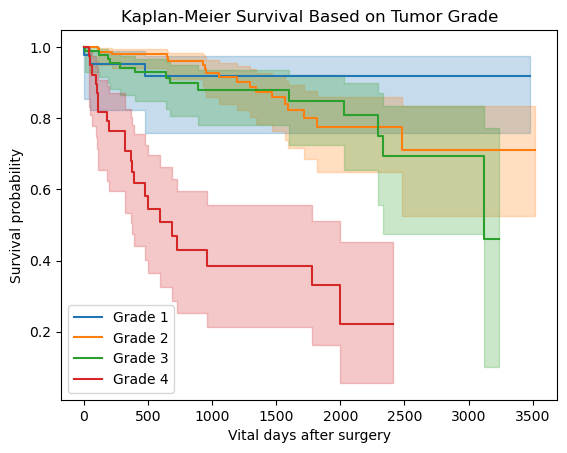

In [3]:
kmf = KaplanMeierFitter()

# make groups based on tumor grade
group_1 = data[data['tumor_isup_grade'] == "1"]
group_2 = data[data['tumor_isup_grade'] == "2"]
group_3 = data[data['tumor_isup_grade'] == "3"]
group_4 = data[data['tumor_isup_grade'] == "4"]

kmf.fit(group_1['vital_days_after_surgery'], event_observed=group_1['vital_status'], label='Grade 1')

kmf.plot()

kmf.fit(group_2['vital_days_after_surgery'], event_observed=group_2['vital_status'], label='Grade 2')

kmf.plot()

kmf.fit(group_3['vital_days_after_surgery'], event_observed=group_3['vital_status'], label='Grade 3')

kmf.plot()

kmf.fit(group_4['vital_days_after_surgery'], event_observed=group_4['vital_status'], label='Grade 4')

kmf.plot()

plt.title('Kaplan-Meier Survival Based on Tumor Grade')
plt.xlabel('Vital days after surgery')
plt.ylabel('Survival probability')

plt.show()

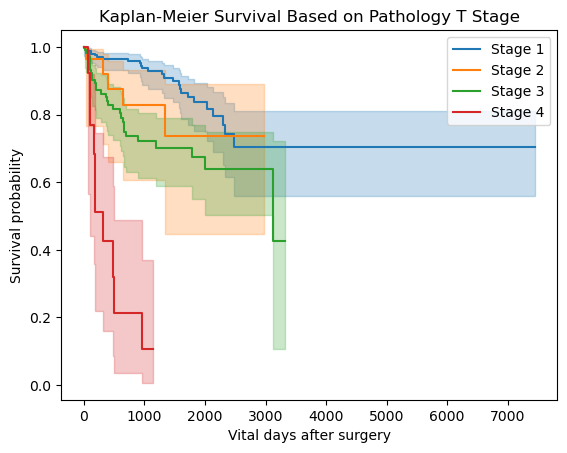

In [4]:
data['pathology_t_stage'] = data['pathology_t_stage'].apply(lambda x: '1' if x in ['1a', '1b'] else ('2' if x in ['2a', '2b'] else x))

# make groups based on tumor stage
group_1 = data[data['pathology_t_stage'] == "1"]
group_2 = data[data['pathology_t_stage'] == "2"]
group_3 = data[data['pathology_t_stage'] == "3"]
group_4 = data[data['pathology_t_stage'] == "4"]

kmf.fit(group_1['vital_days_after_surgery'], event_observed=group_1['vital_status'], label='Stage 1')

kmf.plot()

kmf.fit(group_2['vital_days_after_surgery'], event_observed=group_2['vital_status'], label='Stage 2')

kmf.plot()

kmf.fit(group_3['vital_days_after_surgery'], event_observed=group_3['vital_status'], label='Stage 3')

kmf.plot()

kmf.fit(group_4['vital_days_after_surgery'], event_observed=group_4['vital_status'], label='Stage 4')

kmf.plot()

plt.title('Kaplan-Meier Survival Based on Pathology T Stage')

plt.xlabel('Vital days after surgery')
plt.ylabel('Survival probability')

plt.show()

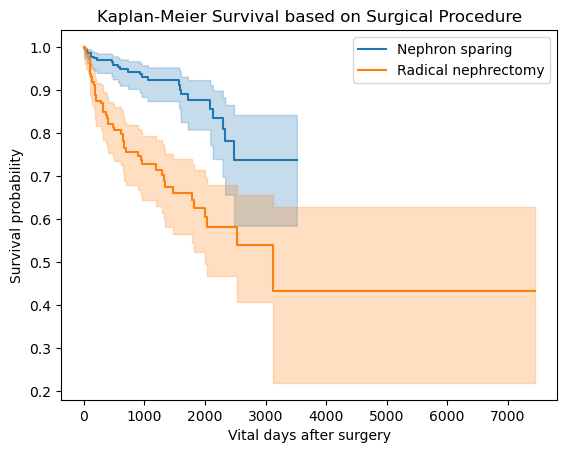

In [5]:
data['nephron_sparing'] = data['surgical_procedure'].apply(lambda x: 1 if x in ['partial_nephrectomy', 'cryoablation', 'radiofrequency_ablation'] else 0)

kmf.fit(data[data['nephron_sparing'] == 1]['vital_days_after_surgery'], event_observed=data[data['nephron_sparing'] == 1]['vital_status'], label='Nephron sparing')

kmf.plot()

kmf.fit(data[data['nephron_sparing'] == 0]['vital_days_after_surgery'], event_observed=data[data['nephron_sparing'] == 0]['vital_status'], label='Radical nephrectomy')

kmf.plot()

plt.title('Kaplan-Meier Survival based on Surgical Procedure')
plt.xlabel('Vital days after surgery')
plt.ylabel('Survival probability')

plt.show()

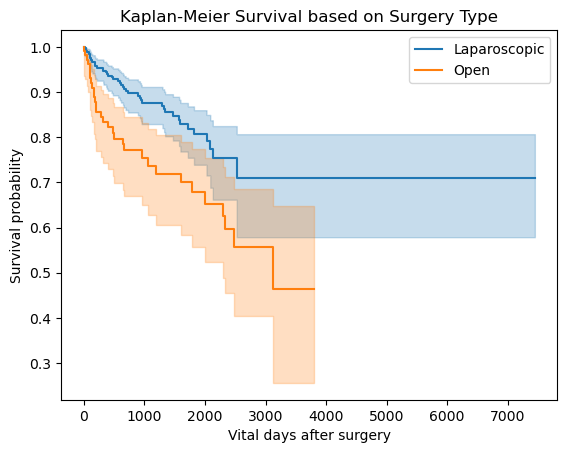

In [6]:
data['laparoscopic'] = data['surgery_type'].apply(lambda x: 1 if x in ['laparoscopic', 'robotic', 'percutaneous'] else 0)

kmf.fit(data[data['laparoscopic'] == 1]['vital_days_after_surgery'], event_observed=data[data['laparoscopic'] == 1]['vital_status'], label='Laparoscopic')

kmf.plot()

kmf.fit(data[data['laparoscopic'] == 0]['vital_days_after_surgery'], event_observed=data[data['laparoscopic'] == 0]['vital_status'], label='Open')

kmf.plot()

plt.title('Kaplan-Meier Survival based on Surgery Type')
plt.xlabel('Vital days after surgery')
plt.ylabel('Survival probability')

plt.show()